In [13]:
import numpy as np
import sympy as sp

In [14]:
_a = float(input("a = "))
_b = float(input("b = "))
_c = float(input("c = "))
_alpha = float(input("alpha = "))
_betta = float(input("beta = "))
_gamma = float(input("gamma = "))
_alpha, _betta, _gamma = np.radians(_alpha), np.radians(_betta), np.radians(_gamma)

_params = np.array([_a, _b, _c, _alpha, _betta, _gamma])

delta = float(input("delta = "))

In [15]:
def calc_theory_d(hkl):
    ksi = 1 - np.cos(_alpha) ** 2 - np.cos(_betta) ** 2 - np.cos(_gamma) ** 2 \
        + 2*np.cos(_alpha)*np.cos(_betta)*np.cos(_gamma)
    denom = (hkl[0] / _a / np.sin(_alpha))**2 + (hkl[1] / _b / np.sin(_betta))**2 + (hkl[2] / _c / np.sin(_gamma))**2 \
    + (2 * hkl[0] * hkl[1] / (_a * _b)) * (np.cos(_alpha) * np.cos(_betta) - np.cos(_gamma)) + \
    + (2 * hkl[2] * hkl[0] / (_c * _a)) * (np.cos(_gamma) * np.cos(_alpha) - np.cos(_betta)) + \
    + (2 * hkl[1] * hkl[2] / (_b * _c)) * (np.cos(_betta) * np.cos(_gamma) - np.cos(_alpha))

    return np.sqrt(ksi / denom)

In [16]:

#Al-----------------------------------------------
hkl_list = [(1, 1, 1), (2,0,0), (2,2,2), (4,0,0)]
d_exp = [2.3330, 2.0207, 1.1665, 1.0103]
#NaCl-----------------------------------------------
# hkl_list = [(2,0,0), (4,0,0)]
# d_exp = [2.8144,1.4072]
#--------------------------------------------------
d_th = []
for i in hkl_list:
    d_th.append(calc_theory_d(i))

print(d_exp)
print(d_th)

[2.333, 2.0207, 1.1665, 1.0103]
[2.8867513459481287, 2.5, 1.4433756729740643, 1.25]


In [17]:
a, b, c, alpha, betta, gamma, h, k, l = sp.symbols('a b c alpha betta gamma h k l')

ksi = 1 - sp.cos(alpha)**2 - sp.cos(betta)**2 - sp.cos(gamma)**2 \
      + 2 * sp.cos(alpha) * sp.cos(betta) * sp.cos(gamma)

denom = (h / a / sp.sin(alpha))**2 + (k / b / sp.sin(betta))**2 + (l / c / sp.sin(gamma))**2 \
        + (2 * h * k / (a * b)) * (sp.cos(alpha) * sp.cos(betta) - sp.cos(gamma)) + \
        (2 * l * h / (c * a)) * (sp.cos(gamma) * sp.cos(alpha) - sp.cos(betta)) + \
        (2 * k * l / (b * c)) * (sp.cos(betta) * sp.cos(gamma) - sp.cos(alpha))

theory_d = sp.sqrt(ksi) / sp.sqrt(denom)
params = [a,b,c,alpha,betta,gamma]
# d_by_a = sp.diff(theory_d, c)
# d_by_alpha = sp.diff(theory_d, alpha)
# d_dp = [d_by_a,d_by_a,d_by_a,d_by_alpha,d_by_alpha,d_by_alpha]
d_dp = list(map(lambda x : sp.diff(theory_d, x), params))

In [18]:
def calc_der(der, hkl):
    return der.subs({a:_a, b:_b, c:_c, alpha:_alpha, betta:_betta, gamma:_gamma, h:hkl[0], k:hkl[1], l:hkl[2]})
A = np.zeros((6,6))

#print(A)
B = np.zeros(6)

#print(B)
while True:
    for i in range(6):
        for j in range(6):
            for idxs in hkl_list:
                A[i][j] += calc_der(d_dp[i], idxs) * calc_der(d_dp[j], idxs)

    for i in range(6):
        for j in range(len(d_exp)):
            B[i] += calc_der(d_dp[i], hkl_list[j]) * (d_th[j] - d_exp[j])
        B[i] = -B[i]

    X, _,_,_ = np.linalg.lstsq(A, B, rcond=None)
    _params += X
    if abs(X[0] / _params[0] < delta):
        break

print(f"a = b = c = {_params[:3]}")
print(f"alpha = betta = gamma = {np.degrees(_params[3:])}")


a = b = c = [4.04136    4.97508135 4.97508135]
alpha = betta = gamma = [97.13866867 97.13866867 97.13866867]


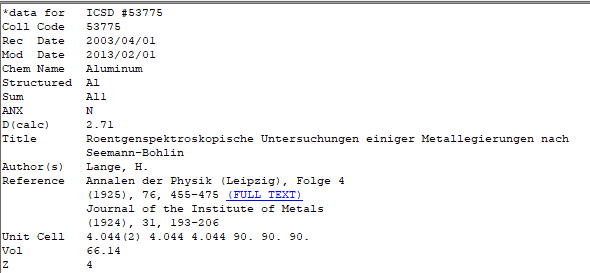
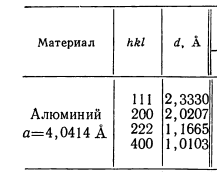

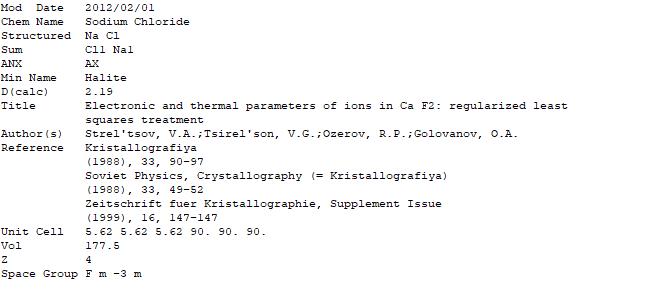